## Part 1

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision. Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams. The data is located at:
http://facweb1.redlands.edu/fac/Tamara_Veenstra/ML/admissions.csv

### Question 1: 

Create a scatterplot for the data, so that admitted students and non-admitted students are plotted with a different symbol and different color with Test 1 on the $x$-axis and Test 2 on the $y$-axis. Does this data look appropriate for our Logistic Regression technique?

### Question 2: 

Perform a logistic regression on the data. Compute the decision boundary for the Logistic Regression and add the decision boundary to your scatterplot.

### Question 3: 

Report on the training accuracy of your Logistic Regression by computing the percentage of examples it got correct. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Import Data
df = pd.read_csv(
    filepath_or_buffer='http://facweb1.redlands.edu/fac/Tamara_Veenstra/ML/admissions.csv', 
    header=0,  # had to do header=0 to not have duplicated headers
    sep=',')

df.columns=["Test 1","Test 2","Status"]
df.dropna(how="all", inplace=True) # drops the empty line at file-end
df.head()
#df.tail()

,Test 1,Test 2,Status
0,34.623660,78.024693,not admitted
1,30.286711,43.894998,not admitted
2,35.847409,72.902198,not admitted
3,60.182599,86.308552,admitted
4,79.032736,75.344376,admitted


In [3]:
df.describe(include="all") # "all" allows for string data

,Test 1,Test 2,Status
count,100.000000,100.000000,100
unique,NaN,NaN,2
top,NaN,NaN,admitted
freq,NaN,NaN,60
mean,65.644274,66.221998,NaN
std,19.458222,18.582783,NaN
min,30.058822,30.603263,NaN
25%,50.919511,48.179205,NaN
50%,67.032988,67.682381,NaN
75%,80.212529,79.360605,NaN


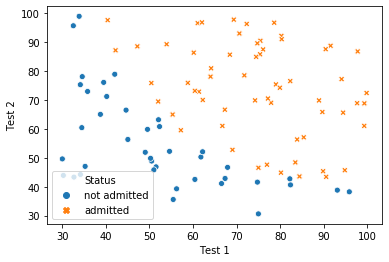

In [4]:
# Create a scatterplot for the data, so that admitted students and non-admitted students 
## are plotted with a different symbol and different color with Test 1 on the
### x -axis and Test 2 on the y-axis.

#can be done with matplotlib below after creating dummies

sns.scatterplot(x= "Test 1", y= "Test 2", hue = "Status", style = "Status", data = df)

This data seems usable for logistic regression because the two data groups appear to seperated diagonally. 

In [5]:
df['Status'].value_counts()

admitted        60
not admitted    40
Name: Status, dtype: int64

In [6]:
df['Status'].unique() #find the different object in the data

array(['not admitted', 'admitted'], dtype=object)

In [7]:
#boolean mask, create new data frame with new entreies with the boolean comes back as true
dfadmit=df[df['Status'] == 'admitted'] 
dfadmit.describe()

,Test 1,Test 2
count,60.000000,60.000000
mean,74.718923,73.956402
std,14.912420,16.012403
min,40.457551,43.390602
25%,63.597244,65.409676
50%,75.436657,74.753748
75%,84.675745,87.442625
max,99.827858,97.718692


In [8]:
X = df[["Test 1", "Test 2"]]
y = df['Status']
print(X.shape)
print(y.shape)
df.head()

(100, 2)
(100,)


,Test 1,Test 2,Status
0,34.623660,78.024693,not admitted
1,30.286711,43.894998,not admitted
2,35.847409,72.902198,not admitted
3,60.182599,86.308552,admitted
4,79.032736,75.344376,admitted


In [9]:
#pd.get_dummies?
#pd.get_dummies(data=df, columns=['Status'])

# create dummies for admitted students where 1 = admitted, and 0 = not
y = pd.get_dummies(df,columns=['Status'])['Status_admitted']
y.head()

0    0
1    0
2    0
3    1
4    1
Name: Status_admitted, dtype: uint8

In [10]:
print(y.unique())

[0 1]


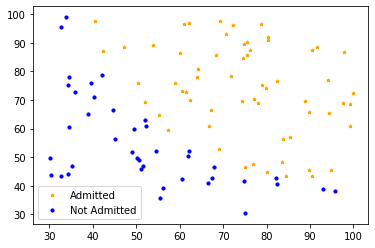

In [11]:
admitted = df.loc[y == 1] # admission

not_admitted = df.loc[y == 0] # no admission

plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, color = 'orange', marker = '*', label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, color = 'blue', label= 'Not Admitted')
plt.legend()
plt.show()

In [12]:
X.head()

,Test 1,Test 2
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376


In [13]:
print(X.shape)
print(y.shape)

(100, 2)
(100,)


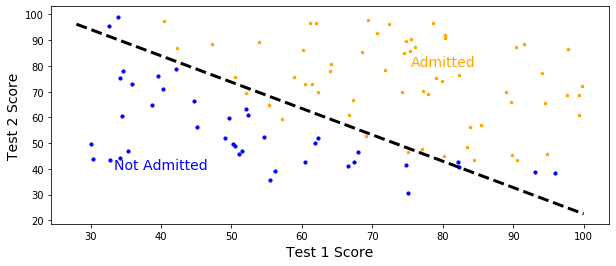

In [14]:
from sklearn.linear_model import LogisticRegression 

## Perform the Logistic Regression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

## Graph the data points, differentating between 0 class and 1 class
plt.figure(figsize=(10, 4))
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, color = 'orange', marker = '*', label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, color = 'blue', label= 'Not Admitted')

## plot decision boundary
left_right = np.array([28, 100])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.plot(left_right, boundary, "k--", linewidth=3)

## Label the graph
plt.text(40, 40, "Not Admitted", fontsize=14, color="b", ha="center")
plt.text(80, 80, "Admitted", fontsize=14, color="orange", ha="center")
plt.xlabel("Test 1 Score", fontsize=14)
plt.ylabel("Test 2 Score", fontsize=14)
#plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

In [15]:
# Report on the training accuracy of your Logistic Regression 
## by computing the percentage of examples it got correct. 

y_pred=log_reg.predict(X)
score=(y_pred==y)
score.value_counts()

# to print % correct I can sum the scores because all True scores are marked with a 1
## therefore the sum of the 1's is the total correct
print("Percentage correct:", sum(score)/len(y)*100, "%")

Percentage correct: 89.0 %


## Part 2
Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips are likely to be working or faulty. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model. The data is located at http://facweb1.redlands.edu/fac/Tamara_Veenstra/ML/chip_test.csv

### Question 4: 

Create a scatterplot for the data, so that admitted chips and rejected chips are plotted with a different symbol and different color with Test1 on the $x$-axis and Test2 on the $y$-axis. Does this data look appropriate for our Logistic Regression technique?

### Question 5: 

Perform a logistic regression on the data. Compute the decision boundary for the Logistic Regression and add the decision boundary to your scatterplot.

### Question 6: 

Report on the training accuracy of your Logistic Regression by computing the percentage of examples it got correct. Explain why this did so poorly.

In [16]:
#Import data from URL

df = pd.read_csv(
    filepath_or_buffer='http://facweb1.redlands.edu/fac/Tamara_Veenstra/ML/chip_test.csv', 
    header=0, 
    sep=',')

df.columns=["Test 1","Test 2","Status"]
df.dropna(how="all", inplace=True) # drops the empty line at file-end
df.head()
#df.tail()

,Test 1,Test 2,Status
0,0.051267,0.69956,working
1,-0.092742,0.68494,working
2,-0.213710,0.69225,working
3,-0.375000,0.50219,working
4,-0.513250,0.46564,working


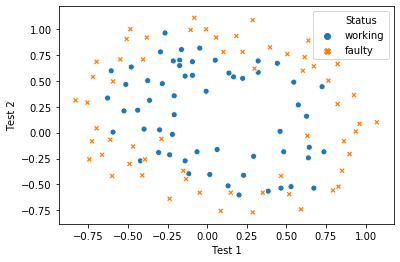

In [17]:
# create scatter
## can be done in seaborn and matplotlib after creating dummies
sns.scatterplot(x= "Test 1", y= "Test 2", hue = "Status", style = "Status", data = df)

In [18]:
#boolean mask, create new data frame with new entreies with the boolean comes back as true
dfworking=df[df['Status'] == 'working'] 
dfworking.describe()

,Test 1,Test 2
count,58.000000,58.000000
mean,0.017499,0.186100
std,0.389523,0.445792
min,-0.628460,-0.601610
25%,-0.278510,-0.190422
50%,-0.078341,0.242690
75%,0.322000,0.569808
max,0.736750,0.962720


In [19]:
X = df[["Test 1", "Test 2"]]
y = df['Status']
print(X.shape)
print(y.shape)
df.head()

(118, 2)
(118,)


,Test 1,Test 2,Status
0,0.051267,0.69956,working
1,-0.092742,0.68494,working
2,-0.213710,0.69225,working
3,-0.375000,0.50219,working
4,-0.513250,0.46564,working


In [20]:
y = pd.get_dummies(df,columns=['Status'])['Status_working']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Status_working, dtype: uint8

In [21]:
print(y.unique())

[1 0]


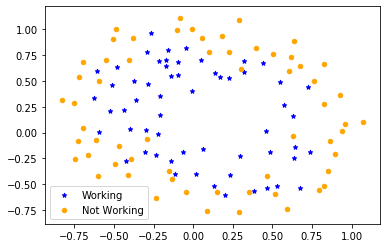

In [22]:
working = df.loc[y == 1] # workinh

not_working = df.loc[y == 0] # not working

plt.scatter(working.iloc[:, 0], working.iloc[:, 1], s=20, color = 'blue', marker = '*', label='Working')
plt.scatter(not_working.iloc[:, 0], not_working.iloc[:, 1], s=20, color = 'orange', label= 'Not Working')
plt.legend()
plt.show()

The data looks pretty awful for a logistic regression.

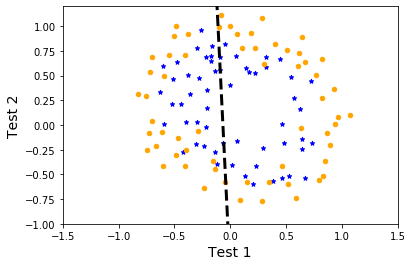

In [29]:
from sklearn.linear_model import LogisticRegression 

## Perform the Logistic Regression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

## Graph the data points, differentating between 0 class and 1 class
plt.figure()
plt.scatter(working.iloc[:, 0], working.iloc[:, 1], s=20, color = 'blue', marker = '*', label='Working')
plt.scatter(not_working.iloc[:, 0], not_working.iloc[:, 1], s=20, color = 'orange', label= 'Not Working')
## plot decision boundary
left_right = np.array([-1,1])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.plot(left_right, boundary, "k--", linewidth=3)

## Label the graph
plt.ylim(-1.0,1.2)
plt.xlim(-1.5,1.5)
plt.xlabel("Test 1", fontsize=14)
plt.ylabel("Test 2", fontsize=14)
#plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

In [24]:
y_pred=log_reg.predict(X)
score=(y_pred==y)
score.value_counts()

print("Percentage correct:", sum(score)/len(y)*100, "%")

Percentage correct: 54.23728813559322 %
